<a href="https://colab.research.google.com/github/kumiori/mec647/blob/main/test_ayoub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import site
import sys


try : 
    from google.colab import files
except:
    pass
    
try:
    from fenics import *; from mshr import *
except ImportError as e:
    !apt-get install software-properties-common
    !add-apt-repository -y ppa:fenics-packages/fenics
    !apt-get update -qq
    !apt install -y fenics    
    site.addsitedir('/usr/lib/petsc/lib/python3/dist-packages')  # Always appends to end

    from fenics import *; from mshr import *
    from ufl import replace

!fenics-version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
software-properties-common is already the newest version (0.96.24.32.14).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math  
from IPython.display import clear_output, display, update_display; import time; 
# import dolfin.common.plotting as fenicsplot 
import time
%matplotlib inline
plt.rcParams['image.cmap'] = 'viridis'

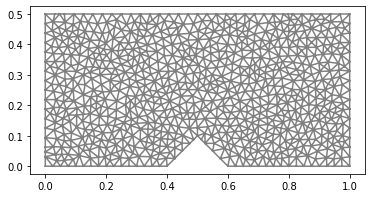

In [4]:
L = 1.; H = .5
a=.1 ; 
#Hcrack=.1 ;Lcrack=.002

P1= Point(L/2-a,0.)
P2= Point(L/2,a)
P3= Point((L/2+a),0.)

#C1=Point((L/2-Lcrack),a);C2=Point((L/2+Lcrack),a+Hcrack);Crack=Rectangle(C1,C2)

#x=np.array([L/2-a/2,L/2,L/2+a/2,L/2-a/2])
#y=np.array([0,a/2.5,0,0])
#plt.plot(x,y)

notchVertices= [P2,P1,P3]
notch = Polygon(notchVertices)
geom= Rectangle(Point(0., 0.), Point(L, H))
G=geom-notch

cell_size = 0.04
nel = int(L/cell_size)

mesh = generate_mesh(G, nel)
plot(mesh)


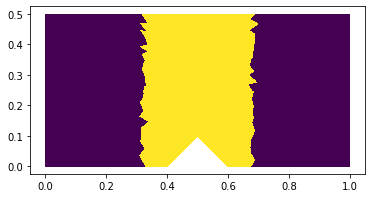

In [5]:
ndim = mesh.topology().dim()

cell_mrk=MeshFunction('bool',mesh,ndim)
cell_mrk.set_all(False)
D=(L/2-a)/5

for cell in cells(mesh):
  if L/2-a-D<cell.midpoint()[0]<L/2+a+D:
    cell_mrk[cell]= True

plot(cell_mrk)

meshFine = refine(mesh,cell_mrk)
#mesh= refine(mesh,cell_mrk)

In [7]:
CompiledSubDomain?

In [10]:
# Function spaces

V_u = VectorFunctionSpace(meshFine, 'P', 1, dim=2)

bc_ptwise = DirichletBC(V_u, Constant((0., 0.)),
                        f'(near(x[0], 0) and near(x[1], 0)) or (near(x[0], { L }) and near(x[1], 0))', method='pointwise')

In [9]:
print(f'Lengtht = { L }')

Lengtht = 1.0


In [11]:
# bcs
# boundary conditions on a small set of the boundary
# _eta = 0.01
# DirichletBC(V_u, Constant((0., 0.)), 'between(x[0], (0., _eta))')